In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.display import HTML 

import matplotlib.pyplot as plt

In [2]:
# Load datasets
train_data = pd.read_csv('data csv files/train.csv')
test_data = pd.read_csv('data csv files/test.csv')

print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1225029, 3)
test data size (117703, 2)


In [3]:
train_data.head()

,id,url,landmark_id
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/...,13287
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/...,4018


In [4]:
test_data.head()

,id,url
0,cb9998b8cdaf6235,https://lh3.googleusercontent.com/-q8B91vDIQZY...
1,30728cf6e50a6bc6,https://lh3.googleusercontent.com/-91gJSKTgv5Q...
2,16afbc86b710337d,https://lh3.googleusercontent.com/-GHZdXuf2wMg...
3,d29b2166cf522450,https://lh3.googleusercontent.com/-cWDnYNQhyws...
4,dd5c03b20c21cfba,https://lh3.googleusercontent.com/-PSLN6BloM-k...


In [5]:
pd.DataFrame(train_data.landmark_id.value_counts().head(10))

,landmark_id
9633,49858
6051,49651
6599,23149
9779,18236
None,13649
2061,13138
5554,10993
6651,9417
5376,9138
6696,9113


In [6]:
print(train_data[train_data.landmark_id == 'None'].head())
print('There are:',train_data[train_data.landmark_id == 'None'].shape[0], 'incomplete photos.')

                   id   url landmark_id
130  fded971ace01c947  None        None
202  06498ccfc7b0d628  None        None
217  90f213260ea36306  None        None
425  22c16539b434bb30  None        None
575  16daff4d9354c65f  None        None
There are: 13649 incomplete photos.


In [7]:
train_data[train_data.landmark_id == 'None'] = np.NaN

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211380 entries, 0 to 1225028
Data columns (total 3 columns):
id             1211380 non-null object
url            1211380 non-null object
landmark_id    1211380 non-null object
dtypes: object(3)
memory usage: 37.0+ MB


In [10]:
train_data.landmark_id = train_data.landmark_id.astype(int)

In [11]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(10))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,9633,49858
1,6051,49651
2,6599,23149
3,9779,18236
4,2061,13138
5,5554,10993
6,6651,9417
7,5376,9138
8,6696,9113
9,2743,8922


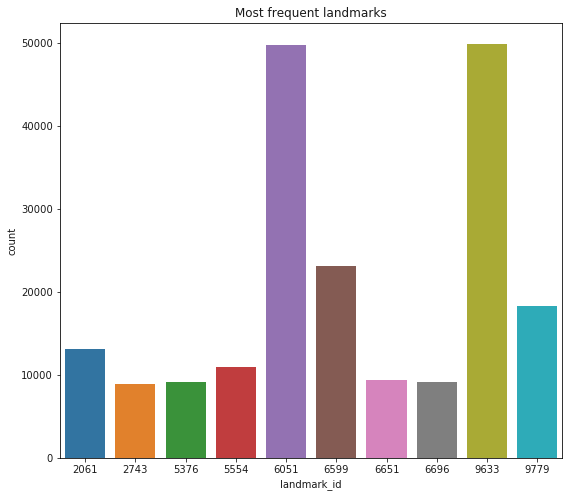

In [12]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [13]:
# Last frequent categories
print("Number of classes under 100 occurences",(train_data.landmark_id.value_counts() <= 100).sum(),
      'out of total number of categories',len(train_data.landmark_id.unique()))

Number of classes under 100 occurences 12949 out of total number of categories 14951


In [14]:
def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [15]:
category = train_data.landmark_id.value_counts().keys()[0]
urls = train_data[train_data.landmark_id == category]['url']
display_category(urls, "")

In [16]:
category = train_data.landmark_id.value_counts().keys()[1]
urls = train_data[train_data.landmark_id == category]['url']
display_category(urls, "")

In [17]:
# Creating csv files with urls of top 10 landmarks, 1000 for training set and 200 for validation of each

for i in range(0,10):
    train_data[train_data.landmark_id == 
           train_data.landmark_id.value_counts().keys()[i]].\
            iloc[0:1000].to_csv(path_or_buf="data csv files/train/%s" % 
                              (train_data.landmark_id.value_counts().keys()[i]), sep=',',index=False)

for i in range(0,10):
    train_data[train_data.landmark_id == 
           train_data.landmark_id.value_counts().keys()[i]].\
            iloc[1001:1200].to_csv(path_or_buf="data csv files/validation/%s" % 
                              (train_data.landmark_id.value_counts().keys()[i]), sep=',',index=False) 

Now, when our files are created we download images to catalogs test and validation.
Example of linux command to run dowland script: python image-downloader.py ../data\ csv\ files/train/2061 ./2061

In [19]:
# creating a small test data set
for i in range(0,10):
    train_data[train_data.landmark_id == 
           train_data.landmark_id.value_counts().keys()[i]].\
            iloc[1201:1220].to_csv(path_or_buf="data csv files/test/%s" % 
                              (train_data.landmark_id.value_counts().keys()[i]), sep=',',index=False)

### Referances:
    * https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis
    * https://www.kaggle.com/maxwell110/python3-version-image-downloader